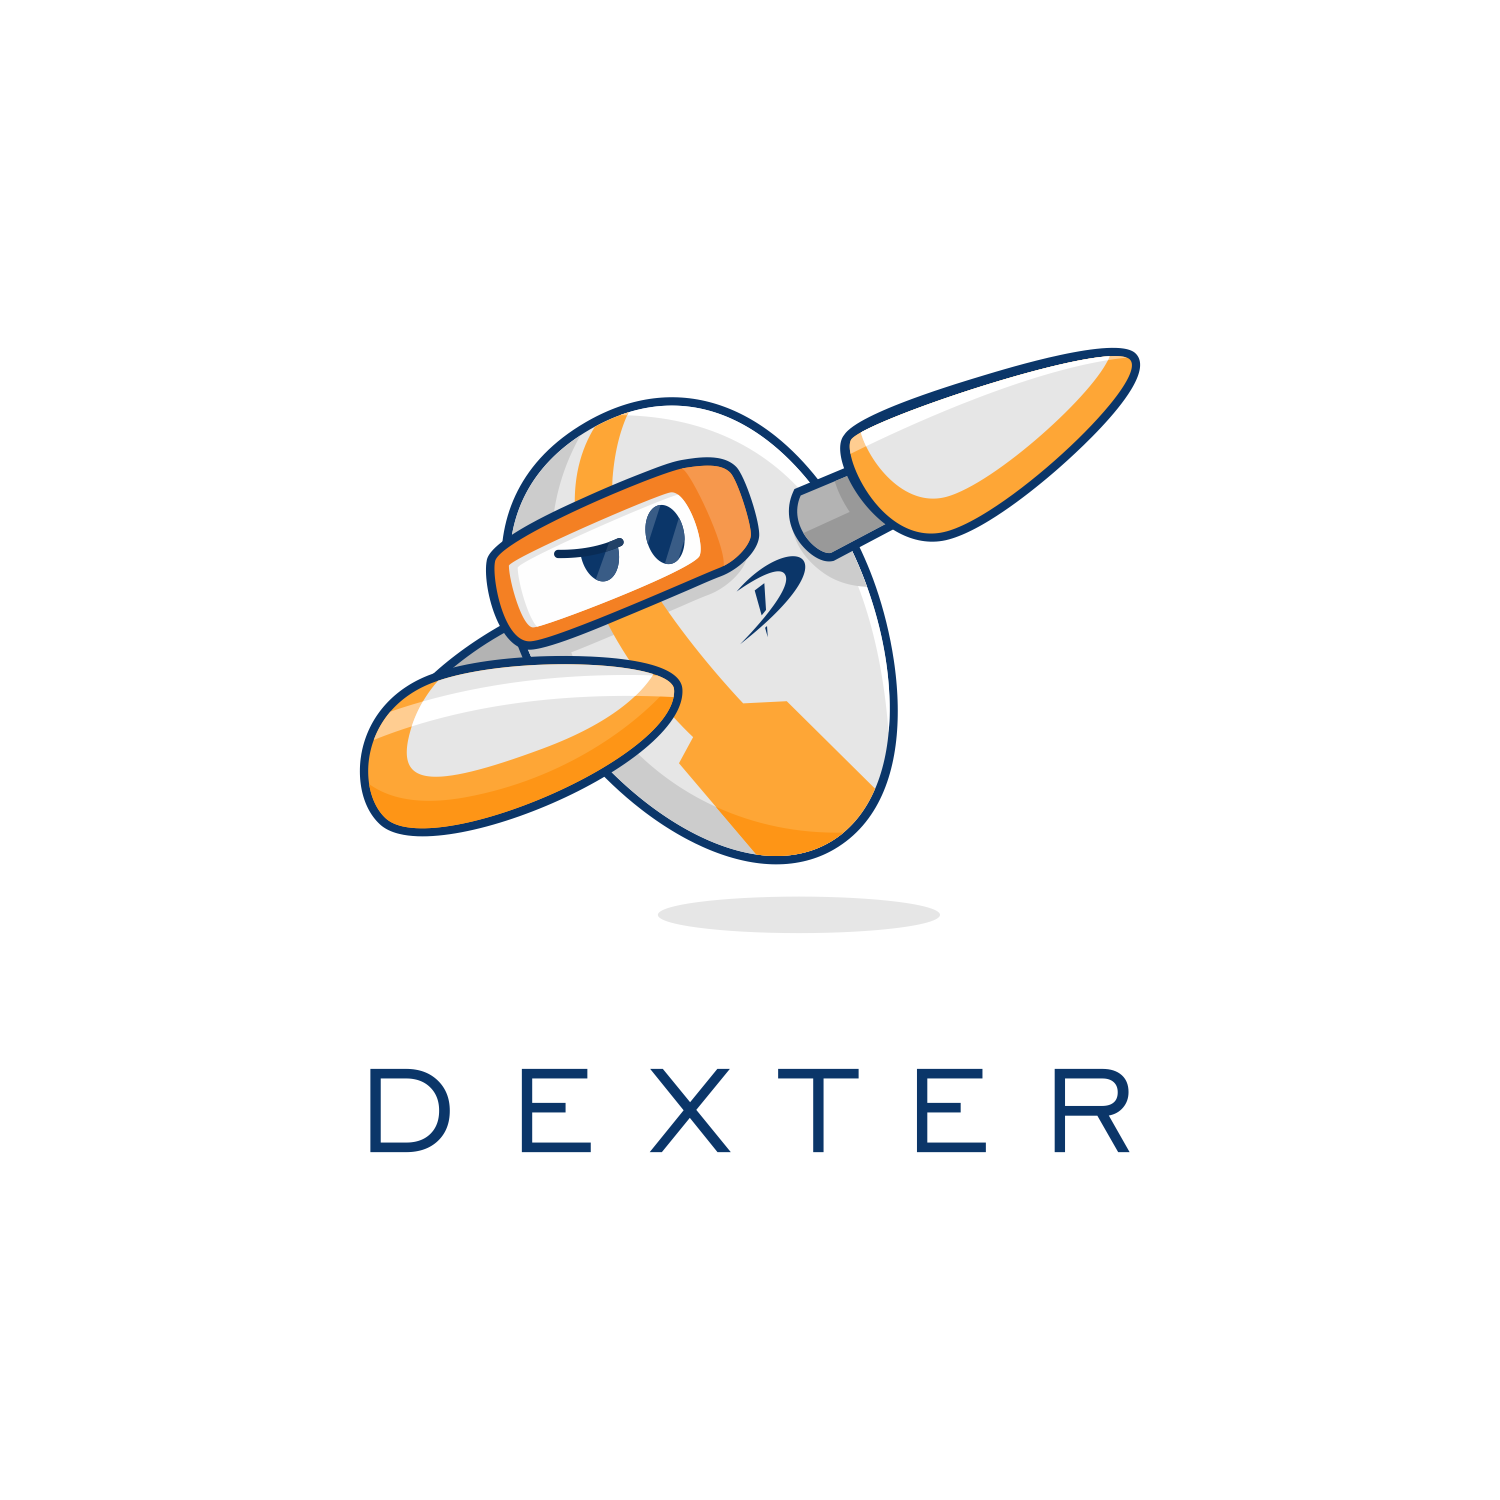

# Analyzing Thanks Giving dinner Project
In this project we will analyze data on Thanksgiving dinner in the US. We'll be working with the pandas library. We will convert the "thanksgiving.csv" file into a dataframe using pandas. In addition we'll use several basic functions in pandas to explore the data.

In [1]:
#Import pandas and read the data.
import pandas as pd
data = pd.read_csv("thanksgiving.csv", encoding ="Latin-1")

In [2]:
#Print the column names.
col = data.columns
print(col)

Index(['RespondentID', 'Do you celebrate Thanksgiving?',
       'What is typically the main dish at your Thanksgiving dinner?',
       'What is typically the main dish at your Thanksgiving dinner? - Other (please specify)',
       'How is the main dish typically cooked?',
       'How is the main dish typically cooked? - Other (please specify)',
       'What kind of stuffing/dressing do you typically have?',
       'What kind of stuffing/dressing do you typically have? - Other (please specify)',
       'What type of cranberry saucedo you typically have?',
       'What type of cranberry saucedo you typically have? - Other (please specify)',
       'Do you typically have gravy?',
       'Which of these side dishes aretypically served at your Thanksgiving dinner? Please select all that apply. - Brussel sprouts',
       'Which of these side dishes aretypically served at your Thanksgiving dinner? Please select all that apply. - Carrots',
       'Which of these side dishes aretypically served

In [3]:
#Prints the table structure(row x column)
print("rows, columns: "+str(data.shape))

#Outputs the first 5 rows of the dataframe
data.head()

rows, columns: (1058, 65)


,RespondentID,Do you celebrate Thanksgiving?,What is typically the main dish at your Thanksgiving dinner?,What is typically the main dish at your Thanksgiving dinner? - Other (please specify),How is the main dish typically cooked?,How is the main dish typically cooked? - Other (please specify),What kind of stuffing/dressing do you typically have?,What kind of stuffing/dressing do you typically have? - Other (please specify),What type of cranberry saucedo you typically have?,What type of cranberry saucedo you typically have? - Other (please specify),...,Have you ever tried to meet up with hometown friends on Thanksgiving night?,"Have you ever attended a ""Friendsgiving?""",Will you shop any Black Friday sales on Thanksgiving Day?,Do you work in retail?,Will you employer make you work on Black Friday?,How would you describe where you live?,Age,What is your gender?,How much total combined money did all members of your HOUSEHOLD earn last year?,US Region
0,4337954960,Yes,Turkey,NaN,Baked,NaN,Bread-based,NaN,None,NaN,...,Yes,No,No,No,NaN,Suburban,18 - 29,Male,"$75,000 to $99,999",Middle Atlantic
1,4337951949,Yes,Turkey,NaN,Baked,NaN,Bread-based,NaN,Other (please specify),Homemade cranberry gelatin ring,...,No,No,Yes,No,NaN,Rural,18 - 29,Female,"$50,000 to $74,999",East South Central
2,4337935621,Yes,Turkey,NaN,Roasted,NaN,Rice-based,NaN,Homemade,NaN,...,Yes,Yes,Yes,No,NaN,Suburban,18 - 29,Male,"$0 to $9,999",Mountain
3,4337933040,Yes,Turkey,NaN,Baked,NaN,Bread-based,NaN,Homemade,NaN,...,Yes,No,No,No,NaN,Urban,30 - 44,Male,"$200,000 and up",Pacific
4,4337931983,Yes,Tofurkey,NaN,Baked,NaN,Bread-based,NaN,Canned,NaN,...,Yes,No,No,No,NaN,Urban,30 - 44,Male,"$100,000 to $124,999",Pacific


It looks like each column name is a survey question and each row is a survey response to each of these questions. Let's clean up the data a little bit by removing all rows didn't answer "Yes" to the first question, "Do you celebrate Thanksgiving?".

We can accomplish by converting the dataframe into a boolean series. Then we'll use the boolean series to filter out all the data that didn't answer "Yes" to the first question

In [4]:
print(data["Do you celebrate Thanksgiving?"].value_counts())

Yes    980
No      78
Name: Do you celebrate Thanksgiving?, dtype: int64


In [5]:
data = data[data["Do you celebrate Thanksgiving?"] == "Yes"]
data.shape

(980, 65)

We can see that the data frame went from 1058 rows to 980 rows, so it looks like we've successfully filtered out the data. Now we can begin analyzing the data. We can use the .value_counts() method on the second question column to see the types of food served on Thanksgiving. The .value_counts() method is especially useful for dataframes that contains a lot of repeats of the same strings. This is often typical in surveys.

In [6]:
data["What is typically the main dish at your Thanksgiving dinner?"].value_counts()

Turkey                    859
Other (please specify)     35
Ham/Pork                   29
Tofurkey                   20
Chicken                    12
Roast beef                 11
I don't know                5
Turducken                   3
Name: What is typically the main dish at your Thanksgiving dinner?, dtype: int64

Suppose we own a restaurant and we are interested in serving tofu turkey with gravy on our menu. We are interested the number of families  that actually serve this dish. We can create a new dataframe using boolean filtering to show only rows with people who had Tofurkey as a main dish on Thanksgiving. In addition we'll look at the "Do you typically have gravy" column to see if people eat this dish with gravy.

In [7]:
data_only_tofurkey = data[data["What is typically the main dish at your Thanksgiving dinner?"] == "Tofurkey"]
Gravy_and_tofurkey = data_only_tofurkey["Do you typically have gravy?"]
Gravy_and_tofurkey.value_counts()

Yes    12
No      8
Name: Do you typically have gravy?, dtype: int64

Only 12 out of 980 people answered yes, so it might be a good idea to not serve this dish in our restaurant.

Next we are interested to see how many people in this survey have apple, pumpkin, or pecan pies during Thanksgiving. We can use the .isnull() method to convert each column into a boolean, then use the & operator to return a boolean series. Then we can use the .value_counts() method to tally up the total number of False statements in the boolean series.

In [8]:
apple = data["Which type of pie is typically served at your Thanksgiving dinner? Please select all that apply. - Apple"]
apple_isnull = apple.isnull()

pumpkin = data["Which type of pie is typically served at your Thanksgiving dinner? Please select all that apply. - Pumpkin"]
pumpkin_isnull = pumpkin.isnull()

pecan = data["Which type of pie is typically served at your Thanksgiving dinner? Please select all that apply. - Pecan"]
pecan_isnull = pecan.isnull()

did_not_eat_pies = apple_isnull & pumpkin_isnull & pecan_isnull 

did_not_eat_pies.value_counts()

False    876
True     104
dtype: int64

It looks like most people had apple, pumpkin, or pecan pies for Thanksgiving. It might be a good idea to prepare extra pies for Thanksgiving to sell people who are too lazy to bake them for the holidays.

We want to make sure this survey isn't biased towards the older generation and covers all ages. Currently the age column is a bit difficult to analyze. We can write a function that and use the .apply() function to convert this column into integers. We'll have to play arround with string manipulation methods such as .split() and .replace() to accomplish this.

In [9]:
#Converts the age column to an integer.
def convert_to_int(column):
    if pd.isnull(column) == True:
        return None
    if pd.isnull(column) == False:
        string = column.split(' ')[0]
        string = string.replace('+', '')
        return int(string)
    
int_age = data["Age"].apply(convert_to_int)
data["int_age"] = int_age

#Outputs statistical data of the column.
data["int_age"].describe()

count    947.000000
mean      40.089757
std       15.352014
min       18.000000
25%       30.000000
50%       45.000000
75%       60.000000
max       60.000000
Name: int_age, dtype: float64

While we took the lower limit of each age range, the respondants of the survey appear to cover all age groups. 

Next we are interested in the income groups of each family. We do this to make sure the average income of the survey respondants is representative of the population.

In [10]:
data["How much total combined money did all members of your HOUSEHOLD earn last year?"].value_counts()

$25,000 to $49,999      166
$75,000 to $99,999      127
$50,000 to $74,999      127
Prefer not to answer    118
$100,000 to $124,999    109
$200,000 and up          76
$10,000 to $24,999       60
$0 to $9,999             52
$125,000 to $149,999     48
$150,000 to $174,999     38
$175,000 to $199,999     26
Name: How much total combined money did all members of your HOUSEHOLD earn last year?, dtype: int64

The responses are in the string format, we are going have to use the apply method along with a function to convert the elements in the column series into an integer so we can use the .describe() method.

In [11]:
income_col = data["How much total combined money did all members of your HOUSEHOLD earn last year?"]

def convert_to_int_inc(column):
    if pd.isnull(column) == True:
        return None
    string = column.split(' ')[0]
    if 'Prefer' in string:
        return None
    else:
        string = string.replace('$', '')
        string = string.replace(',', '')
        return int(string)
    
data['int_income']  = income_col.apply(convert_to_int_inc)
data['int_income'].describe()

count       829.000000
mean      75965.018094
std       59068.636748
min           0.000000
25%       25000.000000
50%       75000.000000
75%      100000.000000
max      200000.000000
Name: int_income, dtype: float64

Once again, we took the lower limit of the income range so the average skews downard. The average income is high even though we took the lower limit. The standard deviation is almost as high as the mean. The median is 75,000 which is relatively close to the average.

Next, let's see if there is any correlation between income and travel distance. We can simply use boolean filtering again with the .value_counts() method.

In [12]:
less_150k = data["int_income"] < 150000
less_150k_data = data[less_150k]

how_far = less_150k_data["How far will you travel for Thanksgiving?"]
how_far.value_counts()

Thanksgiving is happening at my home--I won't travel at all                         281
Thanksgiving is local--it will take place in the town I live in                     203
Thanksgiving is out of town but not too far--it's a drive of a few hours or less    150
Thanksgiving is out of town and far away--I have to drive several hours or fly       55
Name: How far will you travel for Thanksgiving?, dtype: int64

In [13]:
more_150k = data["int_income"] > 150000
more_150k_data = data[more_150k]

how_far_150k_plus = more_150k_data["How far will you travel for Thanksgiving?"]
how_far_150k_plus.value_counts()

Thanksgiving is happening at my home--I won't travel at all                         49
Thanksgiving is local--it will take place in the town I live in                     25
Thanksgiving is out of town but not too far--it's a drive of a few hours or less    16
Thanksgiving is out of town and far away--I have to drive several hours or fly      12
Name: How far will you travel for Thanksgiving?, dtype: int64

In [14]:
high_income_athome = 49/(49+25+16+12) 
low_income_athome = 281/(203+150+55+281)
print(high_income_athome)
print(low_income_athome)

0.4803921568627451
0.40783744557329465


It looks like high income respondants (> 150k) actually stay home at a higher rate than low income respondants (< 150k). This makes sense because high income respondants are older and have more established families. Whereas low income respondants are mostly students who live on campus and have to travel back home for thanksgiving.

We can use .pivot_table() method to see if there is a correlation between age/income and people who spend their Thanksgiving with Friends.

In [15]:
data.pivot_table(
    #The index takes a series as an input and populates the rows of the spreadsheet
    index = "Have you ever tried to meet up with hometown friends on Thanksgiving night?",
    
    #The columns takes a series as an input and populates the columns with its values
    columns = 'Have you ever attended a "Friendsgiving?"',
    
    #The values we populate the matrix with, by default the values will be the mean
    values = 'int_age'
)

"Have you ever attended a ""Friendsgiving?""",No,Yes
Have you ever tried to meet up with hometown friends on Thanksgiving night?,,
No,42.283702,37.010526
Yes,41.475410,33.976744


In [16]:
data.pivot_table(
    index = "Have you ever tried to meet up with hometown friends on Thanksgiving night?",
    columns = 'Have you ever attended a "Friendsgiving?"',
    values = 'int_income'
)

"Have you ever attended a ""Friendsgiving?""",No,Yes
Have you ever tried to meet up with hometown friends on Thanksgiving night?,,
No,78914.549654,72894.736842
Yes,78750.000000,66019.736842


# Result
It turns out that people who spends their thanksgiving with their friends have lower average income and an average age of 34.
